In [2]:
from skimage.color import rgb2gray
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure

In [26]:
plt.gray() # makes image plots grayscale

lena = rgb2gray(imread('lena.tiff')) *255
cameraman = imread('cameraman.tif').astype(np.float64)
tire = imread('tire.tif').astype(np.float64) / 255.0

# plt.imshow(lena)


<Figure size 640x480 with 0 Axes>

In [15]:
#sarah notes for PSNR

#input images
# np.sum
a = lena
b = lena


#mse calculation TO DO

# cooper mse func
def mse(f, g):
	# NOTE: the two images must have the same dimension
	# mse is the sum of squared difference between the two images
	error = np.sum((f.astype(np.float64) - g.astype(np.float64)) ** 2)
	error /= float(f.shape[0] * g.shape[1])
	# return the MSE, the lower the error, the more "similar" the images
	return error

# cooper psnr func
def psnr(f, g):
	MAX_f = 255.0
	log_int = (MAX_f**2)/(mse(f, g))
	log = np.log10(log_int)
	PSNR_out = 10*log
	return PSNR_out


print(mse(a, b))
print(psnr(a,b))

# COOPERS NOTE: this seems to work now


0.0
inf


C:\Users\Cooper\AppData\Local\Temp\ipykernel_1732\400977850.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  log_int = (MAX_f**2)/(mse(f, g))


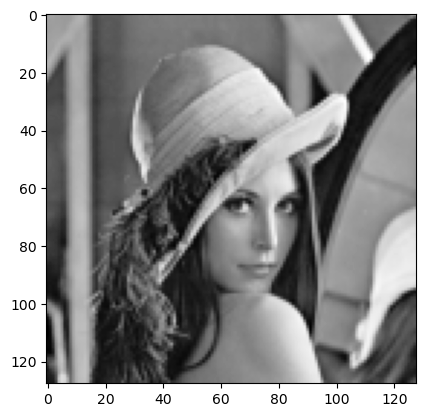

In [37]:
# pt 3: digital zooming

# load lena and cameraman and convert to grayscale
lena = rgb2gray(imread('lena.tiff'))
cameraman = rgb2gray(imread('cameraman.tif')[:,:3]) 
# NOTE 1: cameraman convert to gray needs to be looked at, w/o the [:,:3] it throws an error I don't understand
# and then with it, the down-sampling doesn't work -cooper

# reduce the resolution of the images by a factor of 4 in both the horizontal 
# and vertical direction using bilinear interpolation. Plot the down-sampled images
lena_ds = skimage.transform.rescale(lena.astype(np.float64), 0.25)
# cameraman_ds = skimage.transform.rescale(cameraman.astype(np.float64), 0.25) # broken, see Note 1
plt.imshow(lena_ds)
# plt.imshow(cameraman_ds)

# perform digital zooming to increase the resolution of 
# the down-sampled image back to the resolution of the original images using nni, bli, bci


# plot the up-sample images, compute the PSNR between the originals and up-sampled